In [2]:
#Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

In [3]:
def channel_capacity(n, m, P, sum_x=1):

    # n is the number of different input values
    # m is the number of different output values
    if n*m == 0:
        print('The range of both input and output values must be greater than zero')
        return 'failed', np.nan, np.nan

    # x is probability distribution of the input signal X(t)
    x = cp.Variable(shape=n)

    # y is the probability distribution of the output signal Y(t)
    # P is the channel transition matrix
    y = P*x

    # I is the mutual information between x and y
    c = np.sum(P*np.log2(P),axis=0)
    I = c*x + cp.sum(cp.entr(y))

    # Channel capacity maximised by maximising the mutual information
    obj = cp.Minimize(-I)
    constraints = [cp.sum(x) == sum_x,x >= 0]

    # Form and solve problem
    prob = cp.Problem(obj,constraints)
    prob.solve()
    if prob.status=='optimal':
        return prob.status, prob.value, x.value
    else:
        return prob.status, np.nan, np.nan

n = 2
m = 2
P = np.array([[0.75,0.25],
             [0.25,0.75]])

p_0by1=0.5982945793
p_1by0=0.7007205513

transional_prob=np.array([[1-p_1by0,p_1by0],[p_0by1,1-p_0by1]])
P=transional_prob
stat, C, x = channel_capacity(n, m, P)
print('Problem status: ',stat)
print('Optimal value of C = {:.4g}'.format(C))
print('Optimal variable x = \n', x)

Problem status:  optimal
Optimal value of C = 0.2328
Optimal variable x = 
 [0.46638996 0.53361004]


In [4]:
#basic functions
def discrete_entropy(P_x):
  length=P_x.shape[0]
  entropy=0
  for i in range(length):
    entropy+=-P_x[i]*np.log2(P_x[i])
  return entropy

def joint_discrete_entropy(P_x):
  length=P_x.shape[0]
  entropy=0
  for i in range(P_x.shape[0]):
    for j in range(P_x.shape[1]):
      entropy+=-P_x[i,j]*np.log2(P_x[i,j])
  return entropy

def conditional_entropy(P_x_y,P_x):
  entropy=0
  for i in range(P_x_y.shape[0]):
    for j in range(P_x_y.shape[1]):
      entropy+=-P_x_y[i,j]*np.log2(P_x_y[i,j]/P_x[i])
  return entropy

def mutual_information(P_x_y,P_x,P_y):
  entropy=0
  for i in range(P_x_y.shape[0]):
    for j in range(P_x_y.shape[1]):
      entropy+=P_x_y[i,j]*np.log2(P_x_y[i,j]/(P_x[i]*P_y[j]))
  return entropy

def entropy_ybyx(px,p_ybyx):
  return (sum([px[i]*discrete_entropy(p_ybyx[i,:]) for i in range(len(px))]))[0]

In [5]:
# Given data -transition probability matrix

p_0by1=0.5982945793
p_1by0=0.7007205513

transional_prob=np.array([[1-p_1by0,p_1by0],[p_0by1,1-p_0by1]])

#from the derivation ,by differentiating h_y and h_y|x to get maximum capacity,we get results and using that result directly,

const =( ((p_0by1**p_0by1)*((1-p_0by1)**(1-p_0by1)))/((p_1by0**p_1by0)*((1-p_1by0)**(1-p_1by0))) )**(1/(1-p_1by0-p_0by1))
p = (1-(const+1)*p_0by1)/((1+const)*(1-p_1by0-p_0by1)) #input distribution p which acieves capacity


px = np.array([p , 1-p]).reshape((2,1))
py = (px.T@transional_prob)[0]

Hy = discrete_entropy(py)
Hylx =entropy_ybyx(px,transional_prob)
C = Hy - Hylx

print("Transitional probability matrix is :",transional_prob)
print('px = ',px)
print('py = ',py)
print('Hy = ',Hy)
print('Hybyx = ',Hylx)
print('Capacity is = ', C)



Transitional probability matrix is : [[0.29927945 0.70072055]
 [0.59829458 0.40170542]]
px =  [[0.50546295]
 [0.49453705]]
py =  [0.44715351 0.55284649]
Hy =  0.9919267519247422
Hybyx =  0.9256738612808089
Capacity is =  0.06625289064393336


In [12]:
#Discrete memoryless channel

def dmc(x): #dmc for each bit
    out_alphabet = ['0','1']
    pygivenx = {'0':[0.29927945,0.70072055] , '1':[0.59829458,0.40170542] }
    y = np.random.choice(out_alphabet,1,p=list(pygivenx[x]))
    return y[0]

def dmc_n(xn): #dmc for sequence of bits
    channel_seqout = ''
    for x in xn:
        channel_seqout += dmc(str(x))
    return channel_seqout

def list_to_string(xn):
  yn=''
  for m in xn:
    yn+=str(m)
  return yn

def string_to_list(xn):
  yn=np.array([int(x) for x in xn])
  return yn

In [44]:
#ML rule for decoding

def decoder_ML(channel_seqout,p_0by1,p_1by0):
    decoded_x = ''
    for y in channel_seqout:
        if (p_0by1+p_1by0)<1:   #Take x such that transition probability for that x got maximized
            decoded_x += y
        else :
            decoded_x += str((int(y)+1)%2)
    return decoded_x


# Hamming distance calculation
def calculate_hammingDist(input_seq,out_seq):
  i=0
  count=0
  while(i<len(input_seq)):
    if(input_seq[i]!=out_seq[i]):
      count+=1
    i+=1
  return count

#error rate using hamming distNCE
def calc_error_rate(input_seq,out_seq):
  length=len(input_seq)
  errors=calculate_hammingDist(input_seq,out_seq)
  error_rate=errors/length
  return error_rate

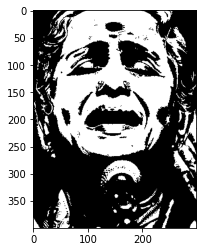

(<matplotlib.image.AxesImage at 0x7fb94491c410>, None)

In [41]:
#Problem 2
#Image data is given to us in question
#Please load the data in your drive 
mss = np.load('mss.npy')
plt.imshow(mss,cmap='gray'), plt.show()

In [42]:
message_array=mss.flatten()

message=list_to_string(message_array)

print("message bits are:",message)
channel_out=dmc_n(message)
print("channel output is :",channel_out)

message bits are: 0000000000000000000000000000000000000000000000011111100000000000011111111111111110000000000000000011111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111100000000000000000000000000000000001111111111111110000011000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011110000000000011111111111111100000000000000000001111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111100000000000000000000000000001111111111111111111100011000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000111100000000000111111111111100000000000000000000111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111110000000000000000000000111111111111111111111111001110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001110000000000011111111111111100000000

error rate =  0.3399916666666667


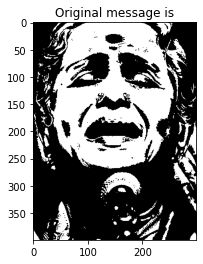

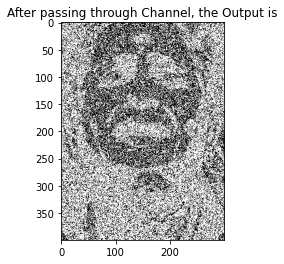

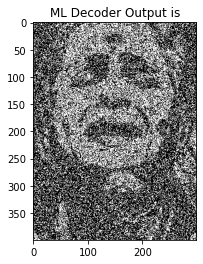

(<matplotlib.image.AxesImage at 0x7fb9402a3d90>,
 Text(0.5, 1.0, 'ML Decoder Output is'),
 None)

In [45]:
p=mss.shape
mss_out = string_to_list(channel_out)
mss_out = np.reshape(mss_out,p)

p_0by1=0.5982945793
p_1by0=0.7007205513
decoder_out = decoder_ML(channel_out,p_0by1,p_1by0)
mss_estimate = string_to_list(decoder_out)
mss_estimate=np.reshape(mss_estimate,p)

error_rate = calc_error_rate(message,decoder_out)

print("error rate = ",error_rate)
plt.figure(1)
plt.imshow(mss,cmap='gray'),plt.title('Original message is'), plt.show() 
plt.figure(2)
plt.imshow(mss_out,cmap='gray'), plt.title('After passing through Channel, the Output is') , plt.show()
plt.figure(3)
plt.imshow(mss_estimate,cmap='gray'), plt.title('ML Decoder Output is'),plt.show() 

In [37]:
#Problem 3
#1/3 Repetition code

def encoder_repetition(xn,rep):
  yn=''
  for y in xn:
    yn+=y*rep
  return yn

def majority_rule(yn,rep):
    output_mk = ''
    for i in range(0,len(yn),rep):
        codeword = yn[i:i+rep]
        if sum(list(map(int,list(codeword)))) <=1 :
            output_mk += '0'
        else : 
            output_mk += '1'
    return output_mk

def decoder_repetition(yn,rep,p_0by1,p_1by0):
  output_mk=majority_rule(yn,rep)
  decoded_bits=decoder_ML(output_mk,p_0by1,p_1by0)
  return decoded_bits

In [47]:
#question 3,part 1
message_array=mss.flatten()

message=list_to_string(message_array)
rep=3
xn_encoded=encoder_repetition(message,3)
#after passing through DMC channel
channel_output_rep=yn = dmc_n(xn_encoded)
print("encoded message bits are:",xn_encoded)

print("channel output for repetion codes is :",channel_output_rep)

decodedout_repetition=decoder_repetition(channel_output_rep,rep,p_0by1,p_1by0)
print("Decoded output for repetition codeis :",decodedout_repetition)
 

error_rate = calc_error_rate(message,decodedout_repetition)

print("error rate for 1/3 repetition = ",error_rate)


encoded message bits are: 00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011111111111111111100000000000000000000000000000000000011111111111111111111111111111111111111111111111100000000000000000000000000000000000000000000000000011111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011111111111111111111111111111111111111111111100000000000000011111100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

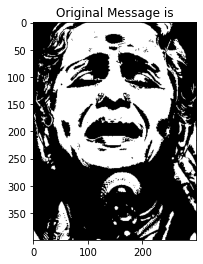

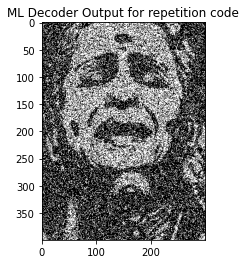

(<matplotlib.image.AxesImage at 0x7fb93fdd3e90>,
 Text(0.5, 1.0, 'ML Decoder Output for repetition code'),
 None)

In [52]:
#Visualisation of results
p=mss.shape
mss_estimate = np.array([int(x) for x in decodedout_repetition])
mss_estimate=np.reshape(mss_estimate,p)
plt.figure(1)
plt.imshow(mss,cmap='gray'),plt.title('Original Message is'), plt.show() 
plt.figure(2)
plt.imshow(mss_estimate,cmap='gray'),plt.title('ML Decoder Output for repetition code'), plt.show() 

In [59]:
#Question 3 part 2

#Finding py5lx5
total_inputComb=[format(i,'05b') for i in range(np.power(2,5))] #2^k i.e 2^5=32
print(total_inputComb)
codewords = ['00000','00111','11100','11011']

Pybyx = np.array([])
# Given data -transition probability matrix

p_0by1=0.5982945793
p_1by0=0.7007205513

transional_prob=np.array([[1-p_1by0,p_1by0],[p_0by1,1-p_0by1]]
                         
for y in codewords:
    for x in total_inputComb:
        tot = 1
        for i in range(len(y)):
            tot*=transional_prob[int(y[i])][int(x[i])]
        Pybyx = np.append(Pybyx,tot)
Pybyx = np.reshape(Pybyx,(4,32))

print("Calculated likelihood matrix for all combinations is",Pybyx)


def encoding(text,codes):
                encoded = ""
                for char in text:
                        encoded += codes[char]
                return encoded

def dmc_block(x):
    out_alphabet = [format(i,'05b') for i in range(np.power(2,5))] #2^k i.e 2^5=32
    pygivenx = {codewords[0] : Pybyx[0,:] , codewords[1] : Pybyx[1,:] ,codewords[2] : Pybyx[2,:] , codewords[3] : Pybyx[3,:]}
    y = np.random.choice(out_alphabet,1,p=pygivenx[x])
    return y[0]

def dmc_block_seq(xn):
    yn = ''
    for i in range(0,len(xn)-(len(codewords[0])-1),len(codewords[0])):
        yn += dmc_block(str(xn[i:i+len(codewords[0])]))
    return yn

def ML_decoder_block(yn,Py5lx5):
    inp_alphabet = {0:'00' , 1: '01', 2 : '10' , 3 :'11'}
    out_alphabet = dict(zip(total_inputComb,[i for i in range(32)]))
    estimate_xn =''
    for i in range(0,len(yn)-4,5):
        estimate_xn = estimate_xn + inp_alphabet[np.argmax(Py5lx5[:,out_alphabet[yn[i:i+5]]])]
    return estimate_xn


['00000', '00001', '00010', '00011', '00100', '00101', '00110', '00111', '01000', '01001', '01010', '01011', '01100', '01101', '01110', '01111', '10000', '10001', '10010', '10011', '10100', '10101', '10110', '10111', '11000', '11001', '11010', '11011', '11100', '11101', '11110', '11111']
Calculated likelihood matrix for all combinations is [[0.00240096 0.0056215  0.0056215  0.01316195 0.0056215  0.01316195
  0.01316195 0.03081686 0.0056215  0.01316195 0.01316195 0.03081686
  0.01316195 0.03081686 0.03081686 0.07215332 0.0056215  0.01316195
  0.01316195 0.03081686 0.01316195 0.03081686 0.03081686 0.07215332
  0.01316195 0.03081686 0.03081686 0.07215332 0.03081686 0.07215332
  0.07215332 0.1689368 ]
 [0.01918223 0.01287928 0.01287928 0.00864737 0.01287928 0.00864737
  0.00864737 0.005806   0.04491247 0.03015502 0.03015502 0.0202466
  0.03015502 0.0202466  0.0202466  0.01359392 0.04491247 0.03015502
  0.03015502 0.0202466  0.03015502 0.0202466  0.0202466  0.01359392
  0.10515621 0.0706037

In [ ]:
encoder = {'00' : '00000', '01' : '00111', '10' : '11100' , '11' : '11011' } 
k = len(mk)
xn = ''
for i in range(0,k-1,2):
    xn = xn + encoder[mk[i:i+2]]
yn =dmc_block_n(xn)
estimate_mk = ML_decoder_block(yn,Py5lx5)
mss_estimate = np.array([int(x) for x in estimate_mk]).reshape(mss.shape)

error_rate = hamming_distance(estimate_mk,mk)/len(mk)
print('error rate =',error_rate)

In [ ]:
plt.imshow(mss_in,cmap='gray'),plt.title('Original'), plt.show() 
plt.imshow(mss_estimate,cmap='gray'),plt.title('Decoder Output'), plt.show() 